In [0]:
'''
1 простота
количество символов
длина
номер - число
только числа
слова из словаря
словат типовые
слова сложные
однокренное двукоренное
наличие аглавных и прописных
количество заглавных
количество прописных
наличие числа между заглавными и прописными

оптимальная константа
'''

'\n1 \xd0\xbf\xd1\x80\xd0\xbe\xd1\x81\xd1\x82\xd0\xbe\xd1\x82\xd0\xb0\n\xd0\xba\xd0\xbe\xd0\xbb\xd0\xb8\xd1\x87\xd0\xb5\xd1\x81\xd1\x82\xd0\xb2\xd0\xbe \xd1\x81\xd0\xb8\xd0\xbc\xd0\xb2\xd0\xbe\xd0\xbb\xd0\xbe\xd0\xb2\n\xd0\xb4\xd0\xbb\xd0\xb8\xd0\xbd\xd0\xb0\n\xd0\xbd\xd0\xbe\xd0\xbc\xd0\xb5\xd1\x80\n\xd1\x82\xd0\xbe\xd0\xbb\xd1\x8c\xd0\xba\xd0\xbe \xd1\x87\xd0\xb8\xd1\x81\xd0\xbb\xd0\xb0\n\xd1\x81\xd0\xbb\xd0\xbe\xd0\xb2\xd0\xb0 \xd0\xb8\xd0\xb7 \xd1\x81\xd0\xbb\xd0\xbe\xd0\xb2\xd0\xb0\xd1\x80\xd1\x8f\n\xd1\x81\xd0\xbb\xd0\xbe\xd0\xb2\xd0\xb0\xd1\x82 \xd1\x82\xd0\xb8\xd0\xbf\xd0\xbe\xd0\xb2\xd1\x8b\xd0\xb5\n\xd1\x81\xd0\xbb\xd0\xbe\xd0\xb2\xd0\xb0 \xd1\x81\xd0\xbb\xd0\xbe\xd0\xb6\xd0\xbd\xd1\x8b\xd0\xb5\n\xd0\xbe\xd0\xb4\xd0\xbd\xd0\xbe\xd0\xba\xd1\x80\xd0\xb5\xd0\xbd\xd0\xbd\xd0\xbe\xd0\xb5 \xd0\xb4\xd0\xb2\xd1\x83\xd0\xba\xd0\xbe\xd1\x80\xd0\xb5\xd0\xbd\xd0\xbd\xd0\xbe\xd0\xb5\n\xd0\xbd\xd0\xb0\xd0\xbb\xd0\xb8\xd1\x87\xd0\xb8\xd0\xb5 \xd0\xb0\xd0\xb3\xd0\xbb\xd0\xb0\xd0\xb2\xd0\xbd\

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# imports needed and logging
import gzip
import gensim 
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import os
import gc

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from pandas import read_csv, DataFrame
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

!pip install -q zxcvbn
import zxcvbn  as zx
import xgboost

import numpy
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

In [0]:
import math

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
url = '/content/gdrive/My Drive/Холдинг/Mind-set/DMIA/dmia-sport-2019-spring/DMIA_sample_submission.csv'
sample_subm = pd.read_csv(url, encoding='utf-8')

In [0]:
sample_subm.head()

,Id,Times
0,0,1.922133
1,1,1.922133
2,2,1.922133
3,3,1.922133
4,4,1.922133


In [0]:
url = '/content/gdrive/My Drive/Холдинг/Mind-set/DMIA/dmia-sport-2019-spring/DMIA_train.csv'
train = pd.read_csv(url, encoding='utf-8')

In [0]:
train.head()

,Password,Times
0,631XniVx2lS5I,2
1,LEGIT747,1
2,742364es,1
3,3846696477,1
4,laurahop,2


In [0]:
url = '/content/gdrive/My Drive/Холдинг/Mind-set/DMIA/dmia-sport-2019-spring/DMIA_Xtest.csv'
test = pd.read_csv(url, encoding='utf-8')

In [0]:
test.head()

,Id,Password,Name
0,0,ThaisCunha,Test
1,1,697775113,Test
2,2,922a16922a,Test
3,3,andy74,Test
4,4,joemack,Test


In [0]:
train['Name']='Train'
test['Name']='Test'

In [0]:
test_train=pd.concat([train,test])

In [0]:
test_train=test_train.reset_index(drop=True)
test_train=test_train.drop(['Id'],axis=1)

In [0]:
test_train.head()

,Name,Password,Times
0,Train,631XniVx2lS5I,2.0
1,Train,LEGIT747,1.0
2,Train,742364es,1.0
3,Train,3846696477,1.0
4,Train,laurahop,2.0


In [0]:
test_train.to_csv('/content/gdrive/My Drive/Холдинг/Mind-set/DMIA/dmia-sport-2019-spring/test_train_full240219.csv', encoding='utf-8')

In [0]:
test_train['Y_log']=test_train['Times']

In [0]:
test_train['Y_log']=test_train['Y_log'].apply(math.log)

In [0]:
s='abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
for c in s:
    print(c)
    test_train[c]=list(test_train['Password'].str.count(c))

a
b
c
d
e
f
g
h
i
j
k
l
m
n
o
p
q
r
s
t
u
v
w
x
y
z
A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z
0
1
2
3
4
5
6
7
8
9


In [0]:
test_train.head()

,Name,Password,Times,Y_log,a,b,c,d,e,f,...,0,1,2,3,4,5,6,7,8,9
0,Train,631XniVx2lS5I,2.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,Train,LEGIT747,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0
2,Train,742364es,1.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0
3,Train,3846696477,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,0.0,3.0,2.0,1.0,1.0
4,Train,laurahop,2.0,0.693147,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
test_train.to_csv('/content/gdrive/My Drive/Холдинг/Mind-set/DMIA/dmia-sport-2019-spring/test_train_addlett240219.csv', encoding='utf-8')

In [0]:
import datetime

In [0]:
guesses_log10=[]
score=[]
guesses=[]
i=[]
j=[]
online_no_throttling_10_per_second=[]
for ndx, member in enumerate(test_train['Password']):
   if (ndx%100000==1):
      print (ndx)
      print(datetime.datetime.now())
   guesses_log10.append(zx.zxcvbn(str(member), user_inputs=[])['guesses_log10'])
   #score.append(zx.zxcvbn(str(member), user_inputs=[])['score'])
   #i.append(zx.zxcvbn(str('member'), user_inputs=[])['sequence'][0]['i'])
   #j.append(zx.zxcvbn(str('member'), user_inputs=[])['sequence'][0]['j'])
   #online_no_throttling_10_per_second.append(float(zx.zxcvbn(str(member), user_inputs=[])['crack_times_seconds']['online_no_throttling_10_per_second']))
   #guesses.append(zx.zxcvbn(str(member), user_inputs=[])['guesses'])

1
2019-02-24 11:11:24.948375
100001
2019-02-24 11:15:32.244133
200001
2019-02-24 11:19:41.129004
300001
2019-02-24 11:23:47.816897
400001
2019-02-24 11:27:54.619757
500001
2019-02-24 11:32:02.234331
600001
2019-02-24 11:36:09.585174
700001
2019-02-24 11:40:18.780595
800001
2019-02-24 11:44:26.138571
900001
2019-02-24 11:48:36.060401
1000001
2019-02-24 11:52:43.359381
1100001
2019-02-24 11:56:50.554770
1200001
2019-02-24 12:00:55.656132
1300001
2019-02-24 12:05:03.367797
1400001
2019-02-24 12:09:11.474113
1500001
2019-02-24 12:13:18.710639
1600001
2019-02-24 12:17:26.878595
1700001
2019-02-24 12:21:32.575703
1800001
2019-02-24 12:25:38.721267
1900001
2019-02-24 12:29:45.315914
2000001
2019-02-24 12:33:52.089309
2100001
2019-02-24 12:37:58.444675
2200001
2019-02-24 12:42:04.418288
2300001
2019-02-24 12:46:09.476064
2400001
2019-02-24 12:50:15.002151
2500001
2019-02-24 12:54:21.039820
2600001
2019-02-24 12:58:27.670782
2700001
2019-02-24 13:02:35.378983
2800001
2019-02-24 13:06:45.792279


In [0]:
zx.zxcvbn(str('631XniVx2lS5I'), user_inputs=[])

{'calc_time': datetime.timedelta(0, 0, 8058),
 'crack_times_display': {'offline_fast_hashing_1e10_per_second': '17.0 minutes',
  'offline_slow_hashing_1e4_per_second': '31.0 years',
  'online_no_throttling_10_per_second': 'centuries',
  'online_throttling_100_per_hour': 'centuries'},
 'crack_times_seconds': {'offline_fast_hashing_1e10_per_second': Decimal('1000.0000000001'),
  'offline_slow_hashing_1e4_per_second': Decimal('1000000000.0001'),
  'online_no_throttling_10_per_second': Decimal('1000000000000.1'),
  'online_throttling_100_per_hour': Decimal('360000000000036.0199840144433')},
 'feedback': {'suggestions': [], 'warning': ''},
 'guesses': Decimal('10000000000001'),
 'guesses_log10': 13.000000000000043,
 'password': '631XniVx2lS5I',
 'score': 4,
 'sequence': [{'guesses': 10000000000000,
   'guesses_log10': 12.999999999999998,
   'i': 0,
   'j': 12,
   'pattern': 'bruteforce',
   'token': '631XniVx2lS5I'}]}

In [0]:
float(zx.zxcvbn(str('dsFdsf'), user_inputs=[])['crack_times_seconds']['online_no_throttling_10_per_second'])


100000.1

In [0]:
test_train['guesses_log10']=guesses_log10

In [0]:
test_train.to_csv('/content/gdrive/My Drive/Холдинг/Mind-set/DMIA/dmia-sport-2019-spring/test_train_addguess240219-3.csv', encoding='utf-8')

In [0]:
#zx.zxcvbn(str('1'), user_inputs=[])

In [0]:
url = '/content/gdrive/My Drive/Холдинг/Mind-set/DMIA/dmia-sport-2019-spring/test_train_addguess240219-3.csv'
test_train = pd.read_csv(url, encoding='utf-8')

In [0]:
url = '/content/gdrive/My Drive/Холдинг/Mind-set/DMIA/dmia-sport-2019-spring/pass_lists/10-million-password-list-top-100.txt'
t100 = pd.read_csv(url, encoding='utf-8')

In [0]:
url = '/content/gdrive/My Drive/Холдинг/Mind-set/DMIA/dmia-sport-2019-spring/pass_lists/10-million-password-list-top-1000.txt'
t1000 = pd.read_csv(url, encoding='utf-8')

In [0]:
url = '/content/gdrive/My Drive/Холдинг/Mind-set/DMIA/dmia-sport-2019-spring/pass_lists/10-million-password-list-top-100000.txt'
t100000 = pd.read_csv(url, encoding='utf-8')

In [0]:
url = '/content/gdrive/My Drive/Холдинг/Mind-set/DMIA/dmia-sport-2019-spring/pass_lists/10-million-password-list-top-1000000.txt'
t1000000 = pd.read_csv(url, encoding='utf-8')

In [0]:
t100['t100']='1'
t1000['t1000']='1'
t100000['t100000']='1'
t1000000['t1000000']='1'

In [0]:
test_train=pd.merge(test_train,t100, left_on=test_train.Password, right_on=t100['123456'], how='left')
test_train=test_train.drop('123456',axis=1)

In [0]:
test_train=pd.merge(test_train,t1000, left_on=test_train.Password, right_on=t1000['123456'], how='left')
test_train=test_train.drop('123456',axis=1)

In [0]:
test_train=pd.merge(test_train,t100000, left_on=test_train.Password, right_on=t100000['123456'], how='left')
test_train=test_train.drop('123456',axis=1)

In [0]:
test_train=pd.merge(test_train,t1000000, left_on=test_train.Password, right_on=t1000000['123456'], how='left')
test_train=test_train.drop('123456',axis=1)

In [0]:
test_train=test_train.fillna(0)
test_train=test_train.drop('Unnamed: 0', axis=1)

In [0]:
test_train.to_csv('/content/gdrive/My Drive/Холдинг/Mind-set/DMIA/dmia-sport-2019-spring/test_train_addguess240219-4.csv', encoding='utf-8')

In [0]:
url = '/content/gdrive/My Drive/Холдинг/Mind-set/DMIA/dmia-sport-2019-spring/test_train_addguess240219-4.csv'
test_train = pd.read_csv(url, encoding='utf-8',nrows=1000000)

In [0]:
new_train = test_train[test_train['Name']=='Train']

In [0]:
Target=new_train['Y_log']

In [0]:
#new_train = test_train[test_train['Name']=='Train']
new_train=new_train.drop(['Y_log', 'Name', 'Password', 'Times'], axis=1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(new_train, Target, test_size=0.3, random_state=1)
X_train2, X_val, y_train2, y_val = train_test_split(X_test, y_test, test_size=0.9, random_state=1)

In [0]:

from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=10, random_state=0,  n_estimators=100)
regr.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [0]:
import pickle
# save the model to disk
filename = '/content/gdrive/My Drive/rf_model.sav'
pickle.dump(regr, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)

In [0]:
dtrain = xgboost.DMatrix(X_train, y_train, missing=0.0, nthread=-1)
dval = xgboost.DMatrix(X_val, y_val, missing=0.0, nthread=-1)
dtest = xgboost.DMatrix(X_test, y_test, missing=0.0, nthread=-1)


In [0]:

def rmsle(predictions, dmat):
    labels = dmat.get_label()
    diffs = numpy.log(predictions + 1) - numpy.log(labels + 1)
    squared_diffs = numpy.square(diffs)
    avg = numpy.mean(squared_diffs)
    return ('RMSLE', numpy.sqrt(avg))
    
params = {
   
    'max_depth': 30,
    'learning_rate': .1,
    'nthread':6,
    'booster' : 'gbtree'
    
}

results = xgboost.cv(params, dtrain, 10, early_stopping_rounds=10, feval=rmsle, nfold=10, verbose_eval=True, show_stdv=False)


[0]	train-RMSLE:0.377166	train-rmse:0.573362	test-RMSLE:0.378557	test-rmse:0.575712
[1]	train-RMSLE:0.343324	train-rmse:0.519964	test-RMSLE:0.346228	test-rmse:0.524949
[2]	train-RMSLE:0.312811	train-rmse:0.472059	test-RMSLE:0.317352	test-rmse:0.479982
[3]	train-RMSLE:0.285134	train-rmse:0.429067	test-RMSLE:0.291441	test-rmse:0.440272
[4]	train-RMSLE:0.259959	train-rmse:0.390487	test-RMSLE:0.268177	test-rmse:0.405309
[5]	train-RMSLE:0.237043	train-rmse:0.355874	test-RMSLE:0.247297	test-rmse:0.374636
[6]	train-RMSLE:0.21617	train-rmse:0.324828	test-RMSLE:0.228598	test-rmse:0.34783
[7]	train-RMSLE:0.197164	train-rmse:0.296966	test-RMSLE:0.211904	test-rmse:0.324517
[8]	train-RMSLE:0.179876	train-rmse:0.271984	test-RMSLE:0.197083	test-rmse:0.304405
[9]	train-RMSLE:0.164128	train-rmse:0.249489	test-RMSLE:0.183967	test-rmse:0.287084


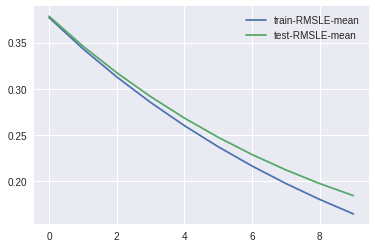

In [0]:
results[['train-RMSLE-mean', 'test-RMSLE-mean']].plot()

In [0]:
evallist = [(dval, 'eval'), (dtrain, 'train')]

num_round = 50
bst = xgboost.train(params, dtrain, num_round,evallist )
bst.save_model('/content/gdrive/My Drive/final.model')



[0]	eval-rmse:0.57518	train-rmse:0.57337
[1]	eval-rmse:0.524434	train-rmse:0.519976
[2]	eval-rmse:0.479539	train-rmse:0.472061
[3]	eval-rmse:0.439833	train-rmse:0.429072
[4]	eval-rmse:0.40494	train-rmse:0.390528
[5]	eval-rmse:0.37426	train-rmse:0.355955
[6]	eval-rmse:0.347433	train-rmse:0.324901
[7]	eval-rmse:0.324144	train-rmse:0.297188
[8]	eval-rmse:0.303927	train-rmse:0.272244
[9]	eval-rmse:0.286618	train-rmse:0.249986
[10]	eval-rmse:0.271777	train-rmse:0.230106
[11]	eval-rmse:0.259023	train-rmse:0.212003
[12]	eval-rmse:0.248281	train-rmse:0.195831
[13]	eval-rmse:0.23923	train-rmse:0.181445
[14]	eval-rmse:0.231636	train-rmse:0.168336
[15]	eval-rmse:0.225375	train-rmse:0.156724
[16]	eval-rmse:0.220175	train-rmse:0.146126
[17]	eval-rmse:0.215833	train-rmse:0.136658
[18]	eval-rmse:0.212213	train-rmse:0.127997
[19]	eval-rmse:0.209329	train-rmse:0.120327
[20]	eval-rmse:0.206918	train-rmse:0.113666
[21]	eval-rmse:0.205021	train-rmse:0.107264
[22]	eval-rmse:0.20348	train-rmse:0.101479
[23]

In [0]:
url = '/content/gdrive/My Drive/Холдинг/Mind-set/DMIA/dmia-sport-2019-spring/test_train_addguess240219-4.csv'
test_train = pd.read_csv(url, encoding='utf-8') #nrows=1000000

In [0]:
subm = test_train[test_train['Name']=='Test'].copy()

In [0]:

subm2=subm.drop(['Y_log', 'Name', 'Password', 'Times'], axis=1)

In [0]:
dtestF = xgboost.DMatrix(subm2, missing=0.0, nthread=-1)

In [0]:
Predict=bst.predict(dtestF)

In [0]:
Predict=pd.Series(Predict).apply(math.exp)

In [0]:
Predict.shape

(1037876,)

In [0]:
Predict[:10]

0    1.002581
1    1.002581
2    1.002581
3    1.002581
4    2.575380
5    1.002581
6    1.002581
7    1.002581
8    1.347074
9    1.002581
dtype: float64

In [0]:
subm['Times']=Predict.values

In [0]:
subm.head()

,Unnamed: 0,Name,Password,Times,Y_log,a,b,c,d,e,...,7,8,9,guesses_log10,t100,t1000,t100000,t1000000,Prediction,send
4151498,4151498,Test,ThaisCunha,1.002581,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.010971,0,0,0,0,NaN,1.002581
4151499,4151499,Test,697775113,1.002581,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,1.0,8.486586,0,0,0,0,NaN,1.002581
4151500,4151500,Test,922a16922a,1.002581,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,9.691789,0,0,0,0,NaN,1.002581
4151501,4151501,Test,andy74,1.002581,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,4.790988,0,0,0,0,NaN,1.002581
4151502,4151502,Test,joemack,2.575380,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,4.630855,0,0,0,1,NaN,2.575380


In [0]:
sample_subm.head()

,Id,Times
0,0,1.922133
1,1,1.922133
2,2,1.922133
3,3,1.922133
4,4,1.922133


In [0]:
pd.merge(test,subm[['Password','Times']]).drop('Password',axis=1).to_csv('/content/gdrive/My Drive/Холдинг/Mind-set/DMIA/dmia-sport-2019-spring/solution240219-1.csv',index=False)

In [0]:
# дальше треш и угар- не смотреть

In [0]:
import math

In [0]:
trainExt=pd.read_csv('/content/gdrive/My Drive/Холдинг/Mind-set/DMIA/dmia-sport-2019-spring/TrainAndY_dump_full.csv', encoding='utf-8')

In [0]:
y=train['Times']

In [0]:
!pip install pymorphy2

    100% |████████████████████████████████| 51kB 2.0MB/s 
    100% |████████████████████████████████| 7.1MB 4.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/9b/04/dd/7daf4150b6d9b12949298737de9431a324d4b797ffd63f526e
Successfully built docopt


In [0]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

2019-02-11 18:42:23,174 : INFO : Loading dictionaries from /usr/local/lib/python2.7/dist-packages/pymorphy2_dicts/data
2019-02-11 18:42:23,233 : INFO : format: 2.4, revision: 393442, updated: 2015-01-17T16:03:56.586168


In [0]:


def name_score(word):
    for p in morph.parse(word):
        if 'Name' in p.tag:
            return p.score
    return 0

def surn_score(word):
    for p in morph.parse(word):
        if 'Surn' in p.tag:
            return p.score
    return 0

In [0]:
trainExt['pymorphy_word_is_known'] = trainExt['Password'].astype('str').apply(morph.word_is_known).astype('int8')

In [0]:
lambda x: 1 if x == 0 else False

In [0]:
trainExt['pymorphy_score'] = trainExt['pymorphy'].apply(lambda x: 1 if x=='OpencorporaTag('NUMB,intg')' else 0)

SyntaxError: ignored

In [0]:
trainExt['pymorphy'] = trainExt['Password'].astype('str').apply(lambda x: morph.tag(x)[0])

In [0]:
set(trainExt['pymorphy'])

{OpencorporaTag('LATN'),
 OpencorporaTag('NUMB,intg'),
 OpencorporaTag('NUMB,real'),
 OpencorporaTag('PNCT'),
 OpencorporaTag('ROMN'),
 OpencorporaTag('UNKN')}

In [0]:

trainExt['pymorphy_number'] = trainExt['pymorphy'].apply(lambda x: x.NUMB)

AttributeError: ignored

In [0]:
trainExt['pymorphy_number'].describe()

count     0
unique    0
Name: pymorphy_number, dtype: int64

In [0]:
np.corrcoef(trainExt['pymorphy_score'],y)

array([[1.00000000e+00, 6.38735571e-05],
       [6.38735571e-05, 1.00000000e+00]])

In [0]:


trainExt['pymorphy_word_is_known'] = trainExt['Password'].astype('str').apply(morph.word_is_known).astype('int8')
trainExt['pymorphy_count_in_tag'] = trainExt['Password'].astype('str').apply(lambda x: len(morph.tag(x))).astype('int8')
trainExt['pymorphy_score'] = trainExt['Password'].astype('str').apply(lambda x: morph.parse(x)[0].score)
trainExt['pymorphy'] = trainExt['Password'].astype('str').apply(lambda x: morph.tag(x)[0])

trainExt['pymorphy_animacy'] = trainExt['pymorphy'].astype('str').apply(lambda x: x.animacy)
trainExt['pymorphy_POS'] = trainExt['pymorphy'].astype('str').apply(lambda x: x.POS)
trainExt['pymorphy_case'] = trainExt['pymorphy'].astype('str').apply(lambda x: x.case)
trainExt['pymorphy_number'] = trainExt['pymorphy'].astype('str').apply(lambda x: x.NUMB)

trainExt['pymorphy_name_score'] = trainExt['Password'].astype('str').apply(name_score)
trainExt['pymorphy_surn_score'] = trainExt['Password'].astype('str').apply(surn_score)

columns_to_one_hot = ['pymorphy' , 'pymorphy_animacy', 'pymorphy_POS', 'pymorphy_case','pymorphy_number']

for col in columns_to_one_hot:
    trainExt[col] = LabelEncoder().fit_transform(list(trainExt[col].fillna('nan')))

AttributeError: ignored

In [0]:
trainExt.head()

,Unnamed: 0,Password,len,a,b,c,d,e,f,g,...,4,5,6,7,8,9,pymorphy_word_is_known,pymorphy_score,pymorphy,pymorphy_number
0,0,631XniVx2lS5I,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0,1.0,LATN,None
1,1,LEGIT747,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,0.0,0.0,0,1.0,LATN,None
2,2,742364es,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,0.0,1.0,1.0,0.0,0.0,0,1.0,LATN,None
3,3,3846696477,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,3.0,2.0,1.0,1.0,0,1.0,"NUMB,intg",None
4,4,laurahop,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,LATN,None


In [0]:
train=train.drop(('Times'), axis=1)

In [0]:
train.sort_values?

In [0]:
train['len']=list(train['Password'].str.len())

In [0]:
s='abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
for c in s:
    print(c)
    train[c]=list(train['Password'].str.count(c))

a
b
c
d


KeyboardInterrupt: ignored

In [0]:
TrainAndY_dump=train.copy()

In [0]:
TrainAndY_dump['Y']=y

In [0]:
TrainAndY_dump.to_csv('/content/gdrive/My Drive/Холдинг/Mind-set/DMIA/dmia-sport-2019-spring/TrainAndY_dump_full.csv')

In [0]:
url = '/content/gdrive/My Drive/Холдинг/Mind-set/DMIA/dmia-sport-2019-spring/TrainAndY_dump_full.csv'
train = pd.read_csv(url, encoding='utf-8')

In [0]:
train.shape

(4151496, 65)

In [0]:
train=train[:100000]

In [0]:
train.head()

,Unnamed: 0,Password,len,a,b,c,d,e,f,g,...,0,1,2,3,4,5,6,7,8,9
0,0,631XniVx2lS5I,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1,LEGIT747,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0
2,2,742364es,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0
3,3,3846696477,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,0.0,3.0,2.0,1.0,1.0
4,4,laurahop,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
data_trained=trainExt.drop(('Password'), axis=1)
data_trained.fillna(data_trained['len'].median(),inplace=True)

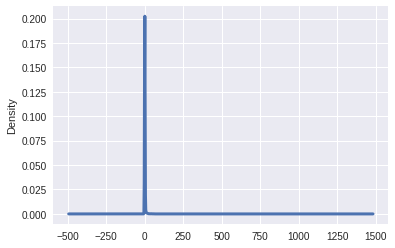

In [0]:
y[:10000].plot(kind='kde', linewidth=3);

In [0]:
difficulty=[]
for ndx, member in enumerate(train['Password'][:100000]):
   difficulty.append(zx.zxcvbn(str(member), user_inputs=[])['guesses_log10'])

In [0]:
data_trained.shape

(100000, 64)

In [0]:
data_trained['guess']=difficulty

In [0]:
data_trained['guess'].head().sort()

NameError: ignored

In [0]:
#diff=zx.zxcvbn(train['Password'], user_inputs=[])['guesses_log10']

In [0]:
data_trained.columns

Index([            u'Unnamed: 0',                    u'len',
                            u'a',                      u'b',
                            u'c',                      u'd',
                            u'e',                      u'f',
                            u'g',                      u'h',
                            u'i',                      u'j',
                            u'k',                      u'l',
                            u'm',                      u'n',
                            u'o',                      u'p',
                            u'q',                      u'r',
                            u's',                      u't',
                            u'u',                      u'v',
                            u'w',                      u'x',
                            u'y',                      u'z',
                            u'A',                      u'B',
                            u'C',                      u'D',
                        

In [0]:
data_trained=data_trained.drop('Unnamed: 0',axis=1)

In [0]:
data_trained=data_trained.drop(u'pymorphy',axis=1)

In [0]:
data_trained=data_trained.drop(u'pymorphy_score',axis=1)

In [0]:
data_trained=data_trained.drop(u'pymorphy_number',axis=1)

In [0]:
data_trained=data_trained.drop(u'pymorphy_word_is_known',axis=1)

In [0]:
data_trained.to_csv('/content/gdrive/My Drive/Холдинг/Mind-set/DMIA/dmia-sport-2019-spring/data_trained100k.csv')

KeyboardInterrupt: ignored

In [0]:
url='/content/gdrive/My Drive/Холдинг/Mind-set/DMIA/dmia-sport-2019-spring/data_trained100k.csv'

In [0]:
data_trained = pd.read_csv(url, encoding='utf-8')

In [0]:
data_trained=data_trained.drop('Y',axis=1)

In [0]:
data_trained['guess']

0        13.000000
1         7.129826
2         8.000000
3         9.283303
4         5.041393
5         5.426446
6         8.000000
7         7.000000
8         8.000000
9         5.271051
10        7.155640
11        8.000000
12        8.013307
13        3.589167
14        7.290737
15        4.000043
16        5.222196
17        6.000000
18        6.004321
19        5.527966
20        4.942504
21        7.000434
22        6.000000
23        7.411451
24        6.000000
25        4.185570
26        6.072617
27       13.000000
28        8.045245
29        7.000000
           ...    
95252     5.144885
95253     5.834497
95254    12.203876
95255     5.436776
95256    11.294202
95257     7.000000
95258     4.293650
95259     8.746299
95260     7.123721
95261     8.394819
95262     8.000000
95263    10.124505
95264     6.000000
95265     8.000000
95266     7.000434
95267     6.000000
95268     6.340444
95269     7.876912
95270     8.000000
95271     7.231724
95272     7.000434
95273     9.

In [0]:
#data_trained=data_trained.drop('Unnamed: 0',axis=1)

In [0]:
#data_trained=data_trained.drop('Unnamed: 0.1',axis=1)

In [0]:
data_trained.shape

(95282, 65)

In [0]:
y.shape

(4151496,)

In [0]:
print (numpy.corrcoef(data_trained['guess'],y[:95282]))

[[ 1.         -0.10392833]
 [-0.10392833  1.        ]]


In [0]:
data_trained=data_trained.drop('Unnamed: 0',axis=1)

In [0]:
for ndx, member in enumerate(data_trained['Password']):
   difficulty.append(zx.zxcvbn(str(member), user_inputs=[])['guesses_log10'])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data_trained, y[:95282], test_size=0.3, random_state=1)
X_train2, X_val, y_train2, y_val = train_test_split(X_test, y_test, test_size=0.9, random_state=1)

In [0]:
X_train.head()

,len,a,b,c,d,e,f,g,h,i,...,1,2,3,4,5,6,7,8,9,guess
25363,11.0,0.0,3.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.000000
30536,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000
58786,10.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.113943
91937,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,7.000000
63598,10.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.975891


In [0]:
X_train.sort_values(by='len', ascending=False).tail()

,len,a,b,c,d,e,f,g,h,i,...,0,1,2,3,4,5,6,7,8,9
43117,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20591,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2749,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58343,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
98298,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [0]:
print 1

1


In [0]:
trainExt.head()


,Unnamed: 0,Password,len,a,b,c,d,e,f,g,...,4,5,6,7,8,9,pymorphy_word_is_known,pymorphy_score,pymorphy,pymorphy_number
0,0,631XniVx2lS5I,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0,1.0,LATN,None
1,1,LEGIT747,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,0.0,0.0,0,1.0,LATN,None
2,2,742364es,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,0.0,1.0,1.0,0.0,0.0,0,1.0,LATN,None
3,3,3846696477,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,3.0,2.0,1.0,1.0,0,1.0,"NUMB,intg",None
4,4,laurahop,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,LATN,None


In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
regr = RandomForestRegressor(max_depth=10, random_state=0,  n_estimators=100)

In [0]:
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data_trained, y[:95282], test_size=0.3, random_state=1)
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=10, random_state=0,  n_estimators=100)
regr.fit(X_train, y_train)


In [0]:
dtrain = xgboost.DMatrix(X_train, y_train, missing=0.0, nthread=-1)

In [0]:
dval = xgboost.DMatrix(X_val, y_val, missing=0.0, nthread=-1)

In [0]:
dtest = xgboost.DMatrix(X_test, y_test, missing=0.0, nthread=-1)

In [0]:
def rmsle(predictions, dmat):
    labels = dmat.get_label()
    diffs = numpy.log(predictions + 1) - numpy.log(labels + 1)
    squared_diffs = numpy.square(diffs)
    avg = numpy.mean(squared_diffs)
    return ('RMSLE', numpy.sqrt(avg))

In [0]:
def rmsle2(predictions, dmat):
    labels = dmat
    diffs = numpy.log(predictions + 1) - numpy.log(labels + 1)
    squared_diffs = numpy.square(diffs)
    avg = numpy.mean(squared_diffs)
    return ('RMSLE', numpy.sqrt(avg))

In [0]:
rmsle_score = make_scorer(rmsle2, greater_is_better=False)
 'objective': 'reg:linear',

In [0]:
params = {
   
    'max_depth': 30,
    'learning_rate': .1,
    'nthread':4,
    'booster' : 'gbtree'
    
}


In [0]:

results = xgboost.cv(params, dtrain, 10, early_stopping_rounds=10, feval=rmsle, nfold=10, verbose_eval=True, show_stdv=False)

[0]	train-RMSLE:0.469673	train-rmse:11.334	test-RMSLE:0.518148	test-rmse:10.7277
[1]	train-RMSLE:0.408427	train-rmse:10.5973	test-RMSLE:0.485553	test-rmse:10.6913
[2]	train-RMSLE:0.361947	train-rmse:9.91989	test-RMSLE:0.462127	test-rmse:10.6366
[3]	train-RMSLE:0.32434	train-rmse:9.28563	test-RMSLE:0.444581	test-rmse:10.6171
[4]	train-RMSLE:0.292716	train-rmse:8.69669	test-RMSLE:0.431635	test-rmse:10.6173
[5]	train-RMSLE:0.265794	train-rmse:8.15043	test-RMSLE:0.421616	test-rmse:10.6337
[6]	train-RMSLE:0.242519	train-rmse:7.6537	test-RMSLE:0.414104	test-rmse:10.6446
[7]	train-RMSLE:0.222244	train-rmse:7.18135	test-RMSLE:0.408726	test-rmse:10.6843
[8]	train-RMSLE:0.204475	train-rmse:6.74526	test-RMSLE:0.404861	test-rmse:10.6584
[9]	train-RMSLE:0.188582	train-rmse:6.32728	test-RMSLE:0.40142	test-rmse:10.6458


In [0]:
evallist = [(dval, 'eval'), (dtrain, 'train')]

In [0]:
dval.feature_names

[u'guess', u'len']

In [0]:
num_round = 10
bst = xgboost.train(params, dtrain, num_round,evallist )

[0]	eval-rmse:8.57408	train-rmse:11.3358
[1]	eval-rmse:8.47357	train-rmse:10.5834
[2]	eval-rmse:8.4028	train-rmse:9.89785
[3]	eval-rmse:8.34014	train-rmse:9.25154
[4]	eval-rmse:8.28928	train-rmse:8.65483
[5]	eval-rmse:8.26553	train-rmse:8.09995
[6]	eval-rmse:8.20716	train-rmse:7.59891
[7]	eval-rmse:8.15667	train-rmse:7.12358
[8]	eval-rmse:8.14309	train-rmse:6.68158
[9]	eval-rmse:8.1138	train-rmse:6.26535


In [0]:
bst.save_model('/content/gdrive/My Drive/final.model')

In [0]:
testF=testF.drop('Y')

ValueError: ignored

In [0]:
testF['Times'] = bst.predict(dtestF)
testF['Times'].plot()

ValueError: ignored

In [0]:
rfresult=X_test.copy()

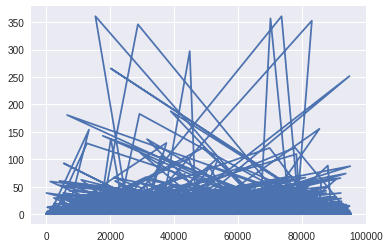

In [0]:
rfresult['rf']=regr.predict(X_test)
rfresult['rf'].plot()

In [0]:
testF

,len,a,b,c,d,e,f,g,h,i,...,2,3,4,5,6,7,8,9,guess,Times
0,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.010971,1.000052
1,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,3.0,0.0,1.0,8.486586,1.000052
2,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,9.691789,1.000052
3,6.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.790988,1.000052
4,7.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.630855,1.000052
5,11.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,8.093737,1.000052
6,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.990339,1.000052
7,6.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.000000,1.000052
8,9.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,9.000000,1.000052
9,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,5.498504,1.000052


In [0]:
bst = xgboost.Booster({'nthread': 4})

In [0]:
bst.load_model('model.bin')

XGBoostError: ignored

In [0]:
bst.load_model('0001.model') 

XGBoostError: ignored

In [0]:
#dtest = xgb.DMatrix(data)
ypred = bst.predict(dtrain)

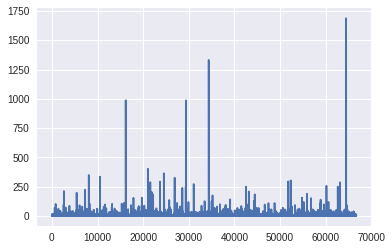

In [0]:
plt.plot(ypred)

In [0]:
ypred.mean()

1.8010702

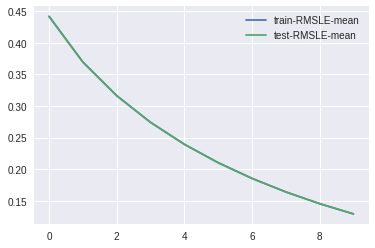

In [0]:
results[['train-RMSLE-mean', 'test-RMSLE-mean']].plot()

In [0]:
import pandas as pd
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score , StratifiedKFold

#import pymorphy2
import pymystem3
#from natasha import NamesExtractor
from sklearn.preprocessing import LabelEncoder
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas(desc="apply")

%matplotlib inline

In [0]:
def validate(x , y):
    model = LGBMRegressor(n_estimators=670 ,learning_rate=0.09 , num_leaves=53 , subsample=0.9 , subsample_for_bin=60000 , min_child_samples = 10 , random_state = 42)
    cv = StratifiedKFold(4 ,shuffle=True, random_state=99)
    score = cross_val_score(model , x , y , scoring=rmsle_score , cv=cv)
    return score.mean() , score.std()
new_train = all_data[all_data['Label'].notnull()]
validate(new_train.drop(['Label' , 'Word' ] , axis=1) , new_train['Label'])

NameError: ignored

In [0]:
#validate(X_train , y_train)

In [0]:
import pymystem3

In [0]:
import pandas as pd
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score , StratifiedKFold

import pymorphy
import pymystem3
from natasha import NamesExtractor
from sklearn.preprocessing import LabelEncoder
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas(desc="apply")

%matplotlib inline

ImportError: ignored

In [0]:
morph = pymorphy2.MorphAnalyzer()

def name_score(word):
    for p in morph.parse(word):
        if 'Name' in p.tag:
            return p.score
    return 0

def surn_score(word):
    for p in morph.parse(word):
        if 'Surn' in p.tag:
            return p.score
    return 0

all_data['pymorphy_word_is_known'] = all_data['Word'].apply(morph.word_is_known).astype('int8')
all_data['pymorphy_count_in_tag'] = all_data['Word'].apply(lambda x: len(morph.tag(x))).astype('int8')
all_data['pymorphy_score'] = all_data['Word'].apply(lambda x: morph.parse(x)[0].score)
all_data['pymorphy'] = all_data['Word'].apply(lambda x: morph.tag(x)[0])

all_data['pymorphy_animacy'] = all_data['pymorphy'].apply(lambda x: x.animacy)
all_data['pymorphy_POS'] = all_data['pymorphy'].apply(lambda x: x.POS)
all_data['pymorphy_case'] = all_data['pymorphy'].apply(lambda x: x.case)
all_data['pymorphy_number'] = all_data['pymorphy'].apply(lambda x: x.number)
all_data['pymorphy_gender'] = all_data['pymorphy'].apply(lambda x: x.gender)

all_data['pymorphy_name_score'] = all_data['Word'].apply(name_score)
all_data['pymorphy_surn_score'] = all_data['Word'].apply(surn_score)

columns_to_one_hot = ['pymorphy' , 'pymorphy_animacy', 'pymorphy_POS', 'pymorphy_case','pymorphy_number', 'pymorphy_gender']

for col in columns_to_one_hot:
    all_data[col] = LabelEncoder().fit_transform(list(all_data[col].fillna('nan')))

In [0]:

#
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)

#print("Test set predictions:\n", tree.predict(X_test))
print("Test set R^2: {:.2f}".format(tree.score(X_test, y_test)))


In [0]:


from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X=X_train, y=y_train)

#print("Test set predictions:\n", lr.predict(X_test))
print("Test set R^2: {:.2f}".format(lr.score(X_test, y_test)))


In [0]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [0]:
rr = Ridge(alpha=0.01) 
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) 
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print ("linear regression train score:", train_score)
print ("linear regression test score:", test_score)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)

In [0]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score )
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001 )
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001 )
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)

In [0]:
X_test.head()

In [0]:
y_test.head()

In [0]:
rr100.predict(X_test)

In [0]:
test.head()

,Id,Password
0,0,ThaisCunha
1,1,697775113
2,2,922a16922a
3,3,andy74
4,4,joemack


In [0]:
test.shape

(1037875, 2)

In [0]:
test['len']=list(test['Password'].str.len())

In [0]:
for c in s:
    print(c)
    test[c]=list(test['Password'].str.count(c))

a
b
c
d
e
f
g
h
i
j
k
l
m
n
o
p
q
r
s
t
u
v
w
x
y
z
A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z
0
1
2
3
4
5
6
7
8
9


In [0]:
test.head()

,Id,Password,len,a,b,c,d,e,f,g,...,0,1,2,3,4,5,6,7,8,9
0,0,ThaisCunha,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,697775113,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,1.0,0.0,1.0,1.0,3.0,0.0,1.0
2,2,922a16922a,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,3,andy74,6.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,4,joemack,7.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
difficultyt=[]

In [0]:
for ndx, member in enumerate(test['Password']):
   #print (member)
   difficultyt.append(zx.zxcvbn(str(member), user_inputs=[])['guesses_log10'])


In [0]:
test['guess']=difficultyt

In [0]:
test.drop(('Password'),axis=1, inplace=True)

In [0]:
test.drop(('Id'),axis=1, inplace=True)

In [0]:
test.head()

,len,a,b,c,d,e,f,g,h,i,...,1,2,3,4,5,6,7,8,9,guess
0,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.010971
1,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,1.0,0.0,1.0,1.0,3.0,0.0,1.0,8.486586
2,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,9.691789
3,6.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.790988
4,7.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.630855


In [0]:
test.to_csv('/content/gdrive/My Drive/Холдинг/Mind-set/DMIA/dmia-sport-2019-spring/data_test.csv')

In [0]:
testF=pd.read_csv('/content/gdrive/My Drive/Холдинг/Mind-set/DMIA/dmia-sport-2019-spring/data_test.csv')

In [0]:
testF.fillna(0,inplace=True)

In [0]:
testF=testF.drop(u'Unnamed: 0',axis=1)

In [0]:
testF=testF.drop(u'Y',axis=1)

In [0]:
testF=testF.drop(u'Times',axis=1)

In [0]:
testF.shape

(1037875, 65)

In [0]:
test.columns

Index([u'Unnamed: 0', u'len', u'a', u'b', u'c', u'd', u'e', u'f', u'g', u'h',
       u'i', u'j', u'k', u'l', u'm', u'n', u'o', u'p', u'q', u'r', u's', u't',
       u'u', u'v', u'w', u'x', u'y', u'z', u'A', u'B', u'C', u'D', u'E', u'F',
       u'G', u'H', u'I', u'J', u'K', u'L', u'M', u'N', u'O', u'P', u'Q', u'R',
       u'S', u'T', u'U', u'V', u'W', u'X', u'Y', u'Z', u'0', u'1', u'2', u'3',
       u'4', u'5', u'6', u'7', u'8', u'9', u'guess'],
      dtype='object')

In [0]:
data_trained.columns

Index([u'Unnamed: 0',        u'len',          u'a',          u'b',
                u'c',          u'd',          u'e',          u'f',
                u'g',          u'h',          u'i',          u'j',
                u'k',          u'l',          u'm',          u'n',
                u'o',          u'p',          u'q',          u'r',
                u's',          u't',          u'u',          u'v',
                u'w',          u'x',          u'y',          u'z',
                u'A',          u'B',          u'C',          u'D',
                u'E',          u'F',          u'G',          u'H',
                u'I',          u'J',          u'K',          u'L',
                u'M',          u'N',          u'O',          u'P',
                u'Q',          u'R',          u'S',          u'T',
                u'U',          u'V',          u'W',          u'X',
                u'Y',          u'Z',          u'0',          u'1',
                u'2',          u'3',          u'4',          u

In [0]:
dtestF = xgboost.DMatrix(testF, missing=0, nthread=-1)

In [0]:
testF=testF.drop('Times',axis=1)

In [0]:
testF['Times']=regr.predict(testF)

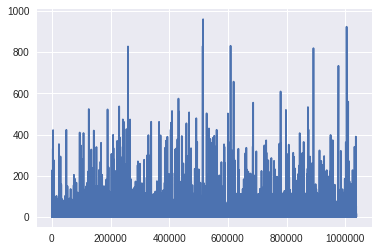

In [0]:
testF['Times'].plot()

In [0]:
dtest.feature_names

[u'len',
 u'a',
 u'b',
 u'c',
 u'd',
 u'e',
 u'f',
 u'g',
 u'h',
 u'i',
 u'j',
 u'k',
 u'l',
 u'm',
 u'n',
 u'o',
 u'p',
 u'q',
 u'r',
 u's',
 u't',
 u'u',
 u'v',
 u'w',
 u'x',
 u'y',
 u'z',
 u'A',
 u'B',
 u'C',
 u'D',
 u'E',
 u'F',
 u'G',
 u'H',
 u'I',
 u'J',
 u'K',
 u'L',
 u'M',
 u'N',
 u'O',
 u'P',
 u'Q',
 u'R',
 u'S',
 u'T',
 u'U',
 u'V',
 u'W',
 u'X',
 u'Y',
 u'Z',
 u'0',
 u'1',
 u'2',
 u'3',
 u'4',
 u'5',
 u'6',
 u'7',
 u'8',
 u'9',
 u'guess']

In [0]:
testF.head

<bound method DataFrame.head of           len    a    b    c    d    e    f    g    h    i    ...        1  \
0        10.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  1.0    ...      0.0   
1         9.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      2.0   
2        10.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      1.0   
3         6.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0    ...      0.0   
4         7.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    ...      0.0   
5        11.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0    ...      0.0   
6         6.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      0.0   
7         6.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0    ...      0.0   
8         9.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0    ...      0.0   
9         9.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      2.0   
10       12.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...      2.0   
11        9.0  1.0  0.0  0.0  0.

In [0]:
testF.head()

,len,a,b,c,d,e,f,g,h,i,...,2,3,4,5,6,7,8,9,guess,Times
0,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.010971,1.0
1,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,3.0,0.0,1.0,8.486586,1.0
2,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,9.691789,1.0
3,6.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.790988,1.0
4,7.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.630855,1.0


In [0]:
test.head()

In [0]:
#test['Times']=rr100.predict(test)

In [0]:
test['Times']

KeyError: ignored

In [0]:
df = testF.loc[:,['Times']]

In [0]:
df.head()

In [0]:
#df['Times'].apply(lambda x: x if (x > 0) else 1)

In [0]:
fileW=open('/content/gdrive/My Drive/Холдинг/Mind-set/DMIA/dmia-sport-2019-spring/DMIARF.csv','w')
df.to_csv(fileW)

In [0]:
fileW.close()

In [0]:
morph = pymorphy2.MorphAnalyzer()

def name_score(word):
    for p in morph.parse(word):
        if 'Name' in p.tag:
            return p.score
    return 0

def surn_score(word):
    for p in morph.parse(word):
        if 'Surn' in p.tag:
            return p.score
    return 0

trainD['pymorphy_word_is_known'] = all_data['Word'].apply(morph.word_is_known).astype('int8')
trainD['pymorphy_count_in_tag'] = all_data['Word'].apply(lambda x: len(morph.tag(x))).astype('int8')
trainD['pymorphy_score'] = all_data['Word'].apply(lambda x: morph.parse(x)[0].score)
trainD['pymorphy'] = all_data['Word'].apply(lambda x: morph.tag(x)[0])

trainD['pymorphy_animacy'] = all_data['pymorphy'].apply(lambda x: x.animacy)
trainD['pymorphy_POS'] = all_data['pymorphy'].apply(lambda x: x.POS)
trainD['pymorphy_case'] = all_data['pymorphy'].apply(lambda x: x.case)
trainD['pymorphy_number'] = all_data['pymorphy'].apply(lambda x: x.number)

trainD['pymorphy_name_score'] = all_data['Word'].apply(name_score)
trainD['pymorphy_surn_score'] = all_data['Word'].apply(surn_score)

columns_to_one_hot = ['pymorphy' , 'pymorphy_animacy', 'pymorphy_POS', 'pymorphy_case','pymorphy_number']

for col in columns_to_one_hot:
    all_data[col] = LabelEncoder().fit_transform(list(all_data[col].fillna('nan')))